In [1]:
# Import pandas
import pandas as pd

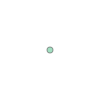

In [2]:
# Import point
from shapely.geometry import Point

# Validate library
latitude = -23.56 	
longitude = -46.59
Point(longitude, latitude)

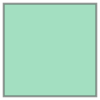

In [3]:
# Import polygon
from shapely.geometry import Polygon

#Validate library
Polygon([[0, 0], [1, 0], [1, 1], [0, 1], [0, 0]])

In [4]:
# Test mapping tool
Polygon([[0, 0], [1, 0], [1, 1], [0, 1], [0, 0]]).contains(Point(0.1,0.9))

True

In [5]:
# Read in dataframes
properties = pd.read_csv('./datasets/property_addresses.csv')
geospat = pd.read_csv('./datasets/geo_stats.csv')

In [6]:
properties.head()

,Unnamed: 0,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor_BRL,CEP,Latitude,Longitude
0,0,Avenida Itacira,Planalto Paulista,São Paulo,1000,4,8,6,7000000.0,4061000.0,-23.615793,-46.648162
1,1,Avenida Itacira,Planalto Paulista,São Paulo,1000,4,8,6,7000000.0,4061001.0,-23.615793,-46.648162
2,2,Avenida Itacira,Planalto Paulista,São Paulo,1000,4,8,6,7000000.0,4061002.0,-23.615793,-46.648162
3,3,Avenida Itacira,Planalto Paulista,São Paulo,1000,4,8,6,7000000.0,4061003.0,-23.615793,-46.648162
4,4,Avenida Itacira,Planalto Paulista,São Paulo,361,4,6,4,2300000.0,4061000.0,-23.615793,-46.648162


In [7]:
geospat.head()

,Unnamed: 0,CD_SETOR,NM_MUN,NM_DIST,geometry,DISTRITO,DOMICILIOS,MORADORES_SETOR,MORADORES_DOMICILIO,RENDA_MENSAL
0,0,355030801000001,São Paulo,Água Rasa,"POLYGON ((-46.5695431899999 -23.5691775939999,...",ÁGUA RASA,266.0,800.0,3.01,2091.32
1,1,355030801000002,São Paulo,Água Rasa,"POLYGON ((-46.568063622999894 -23.565205594, -...",ÁGUA RASA,306.0,913.0,2.98,1650.09
2,2,355030801000003,São Paulo,Água Rasa,POLYGON ((-46.5661900549999 -23.56605486399999...,ÁGUA RASA,189.0,625.0,3.31,1280.43
3,3,355030801000004,São Paulo,Água Rasa,POLYGON ((-46.568763432000004 -23.568560246999...,ÁGUA RASA,181.0,572.0,3.16,1119.59
4,4,355030801000005,São Paulo,Água Rasa,"POLYGON ((-46.5712051149999 -23.5700484059999,...",ÁGUA RASA,240.0,754.0,3.14,1416.90


In [8]:
# Define point by geographic coordinates
properties['Point'] = ''
for i in properties.index:
    properties['Point'][i] = Point(properties['Longitude'][i], properties['Latitude'][i])

# Map 
properties['setor_censo'] = properties["Point"].map(lambda x: geospat.loc[geospat.contains(x), 'CD_SETOR'].values).str[0]
properties.sample(10)

/tmp/ipykernel_5482/1139534768.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  properties['Point'][i] = Point(properties['Longitude'][i], properties['Latitude'][i])


AttributeError: 'DataFrame' object has no attribute 'contains'

In [ ]:
# Save df to csv
properties.to_csv('/media/marianne/OS/Users/maria/Code/sp_housing/datasets/mapped_properties.csv')

In [ ]:
# Read full csv file
mapped_properties = pd.read_csv('/media/marianne/OS/Users/maria/Code/sp_housing/datasets/mapped_properties.csv')
mapped_properties.info()